### Part 1 : Voronoi mesh generation

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import geopandas as gpd
from mf6Voronoi.geoVoronoi import createVoronoi
from mf6Voronoi.geoUtils import plotOrgDistPoints, plotCirclesPoints, plotKeyList

In [3]:

#Create mesh object
vorMesh = createVoronoi(meshName='siteDewatering',maxRef = 10, multiplier=1.5)

#Open limit layers and refinement definition layers
vorMesh.addLimit('basin','../../examples/siteDewatering/Shp/modelAoi2.shp')
vorMesh.addLayer('ghb','../../examples/siteDewatering/Shp/modelGhb.shp',2)
vorMesh.addLayer('drn','../../examples/siteDewatering/Shp/drains.shp',1)
vorMesh.addLayer('wel','../../examples/siteDewatering/Shp/pointWell.shp',1)

In [4]:
#Generate point pair array
vorMesh.generateOrgDistVertices()

#Generate the point cloud and voronoi
vorMesh.createPointCloud()
vorMesh.generateVoronoi()


/--------Layer ghb discretization-------/
Progressive cell size list: [2, 5.0, 9.5] m.

/--------Layer drn discretization-------/
Progressive cell size list: [1, 2.5, 4.75, 8.125] m.

/--------Layer wel discretization-------/
Progressive cell size list: [1, 2.5, 4.75, 8.125] m.

/----Sumary of points for voronoi meshing----/
Distributed points from layers: 3
Points from layer buffers: 916
Points from max refinement areas: 380
Points from min refinement areas: 0
Total points inside the limit: 1391
/--------------------------------------------/

Time required for point generation: 0.14 seconds 


/----Generation of the voronoi mesh----/

Time required for voronoi generation: 0.07 seconds 



In [ ]:
#Export generated voronoi mesh
vorMesh.getVoronoiAsShp(outputPath='output')

In [ ]:
#Export point data and voronoi polygons

outPath = 'output'
#Points
# vorMesh.getPointsAsShp('vertexOrg',outPath+'/vertexOrg.shp')
#vorMesh.getPointsAsShp('vertexDist',outPath+'/vertexDist.shp')
# vorMesh.getPointsAsShp('vertexBuffer',outPath+'/vertexBuffer.shp')
# vorMesh.getPointsAsShp('vertexMaxRef',outPath+'/vertexMaxRef.shp')
# vorMesh.getPointsAsShp('vertexMinRef',outPath+'/vertexMinRef.shp')
# vorMesh.getPointsAsShp('vertexTotal',outPath+'/vertexTotal.shp')
#Polygons

#vorMesh.getPolyAsShp('voronoiRegions',outPath+'/voronoiRegions.shp')


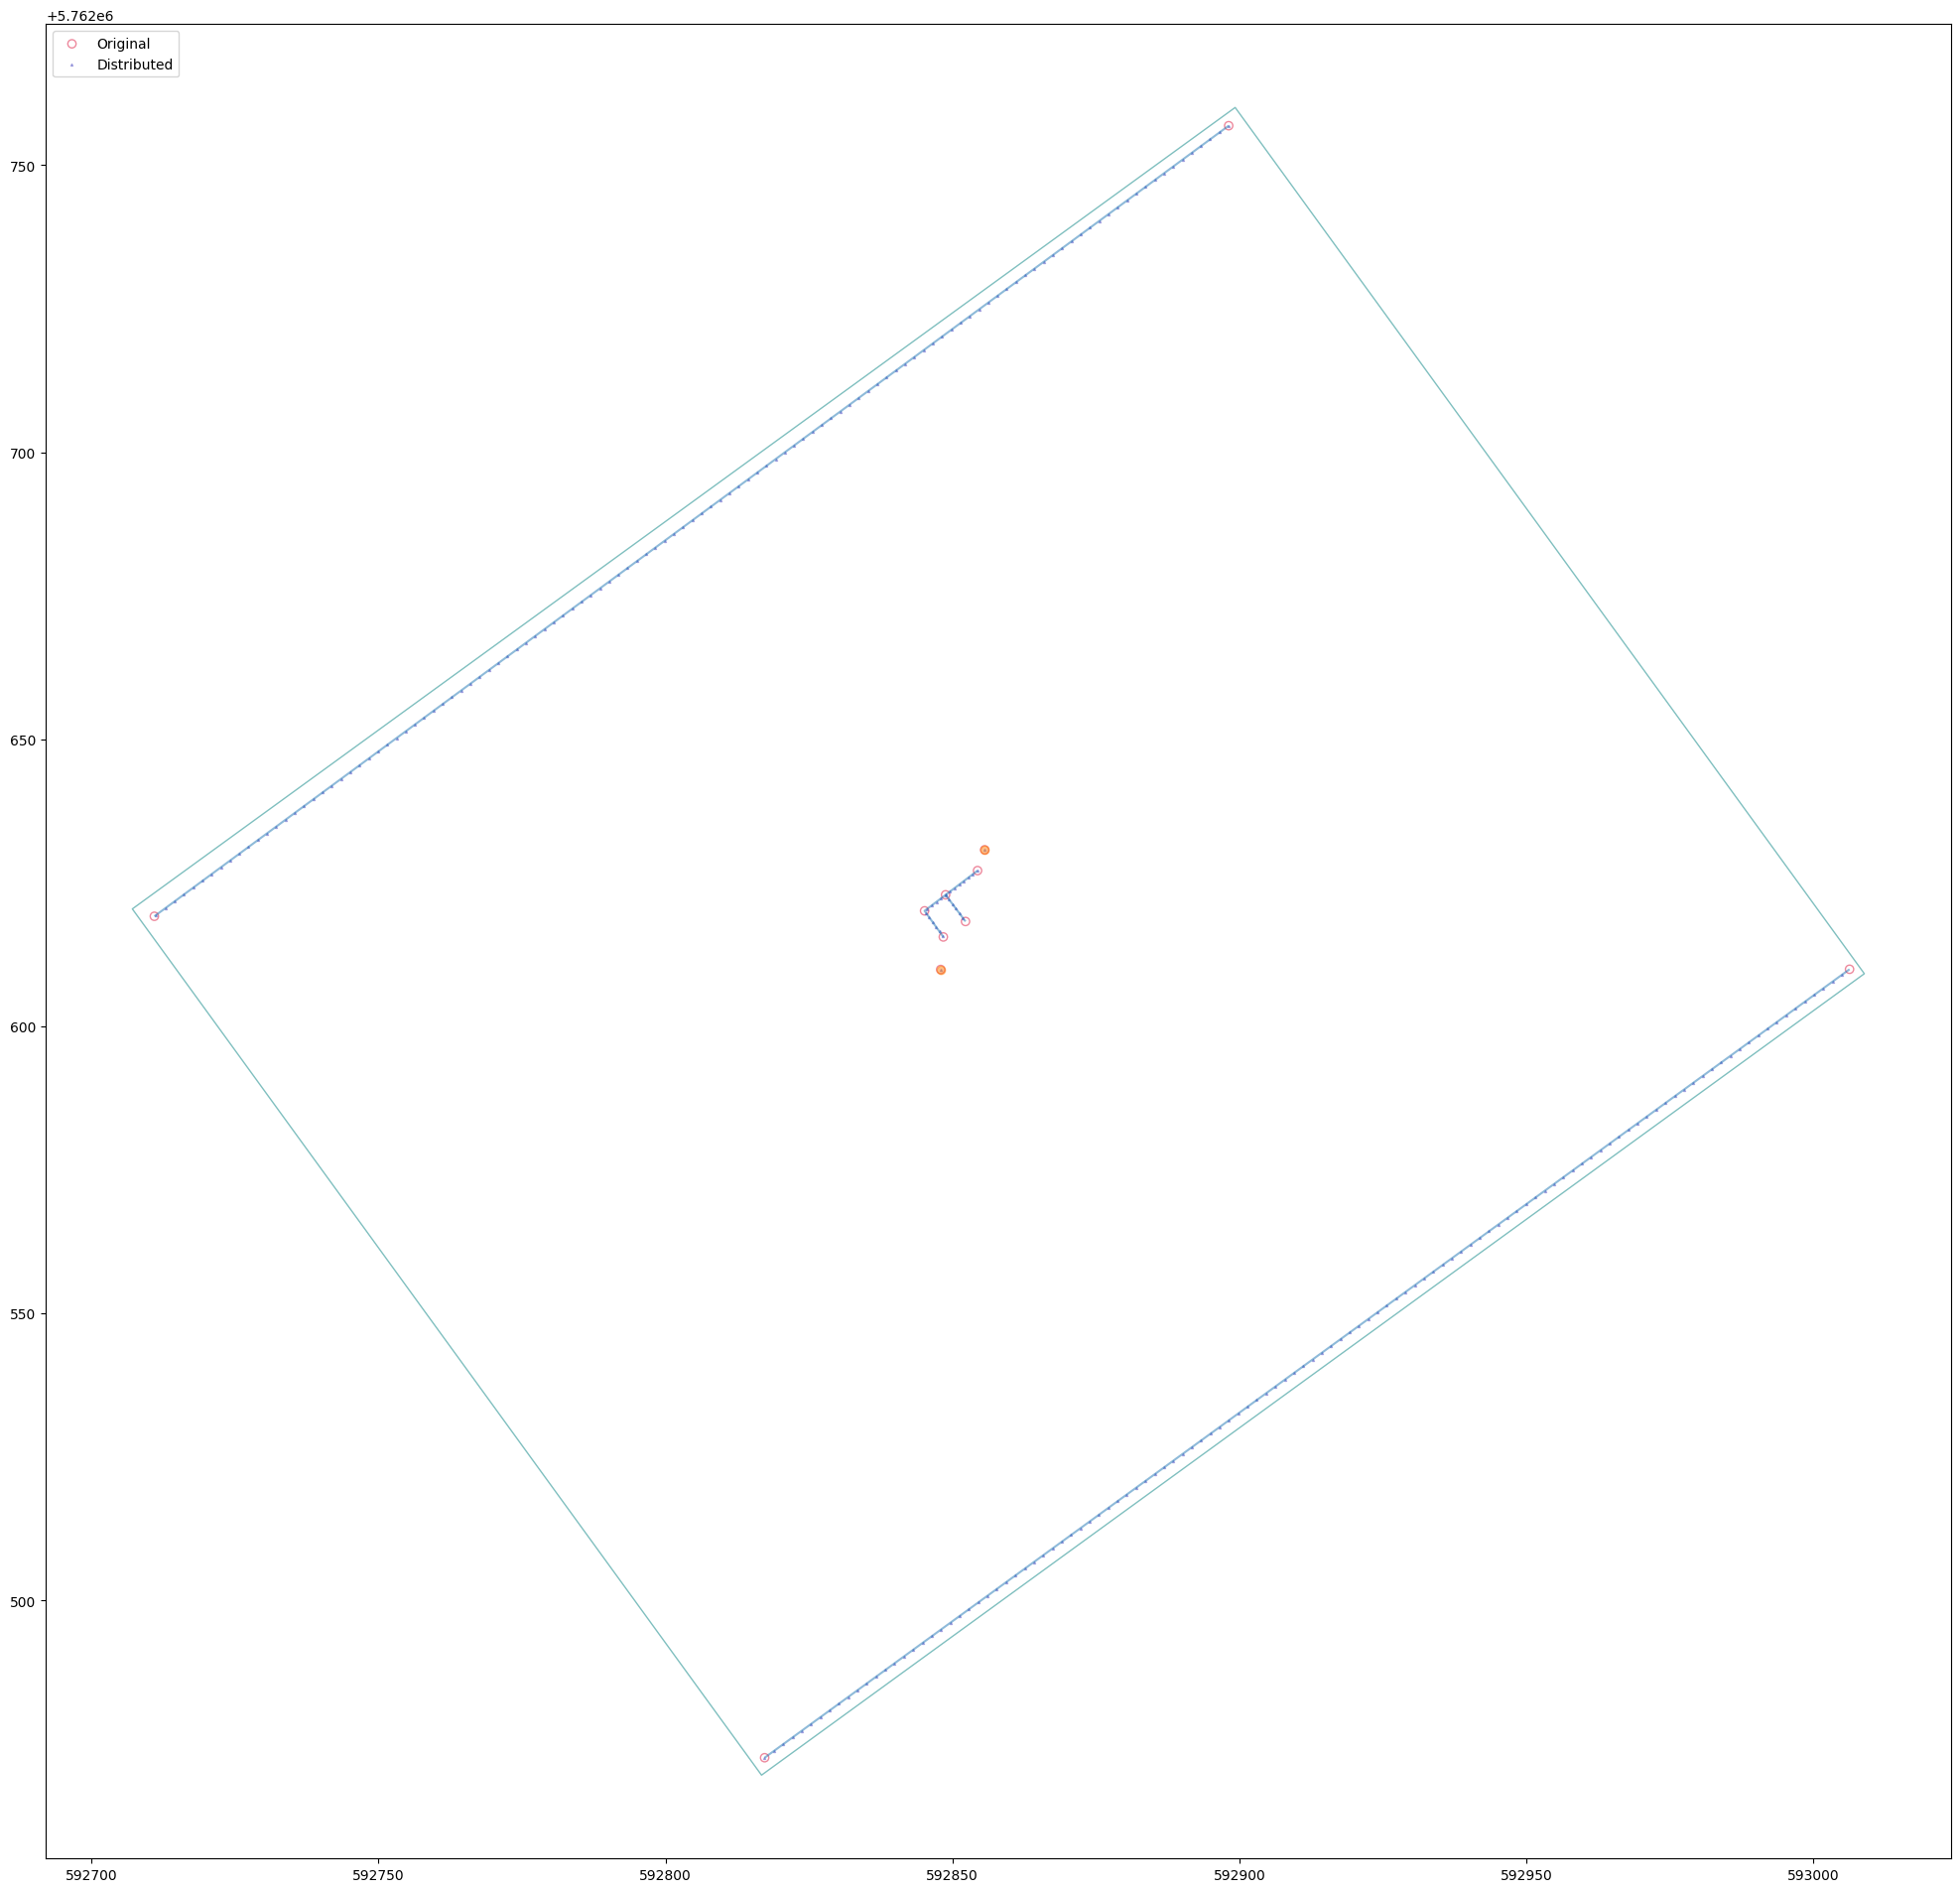

In [5]:
plotOrgDistPoints(vorMesh)

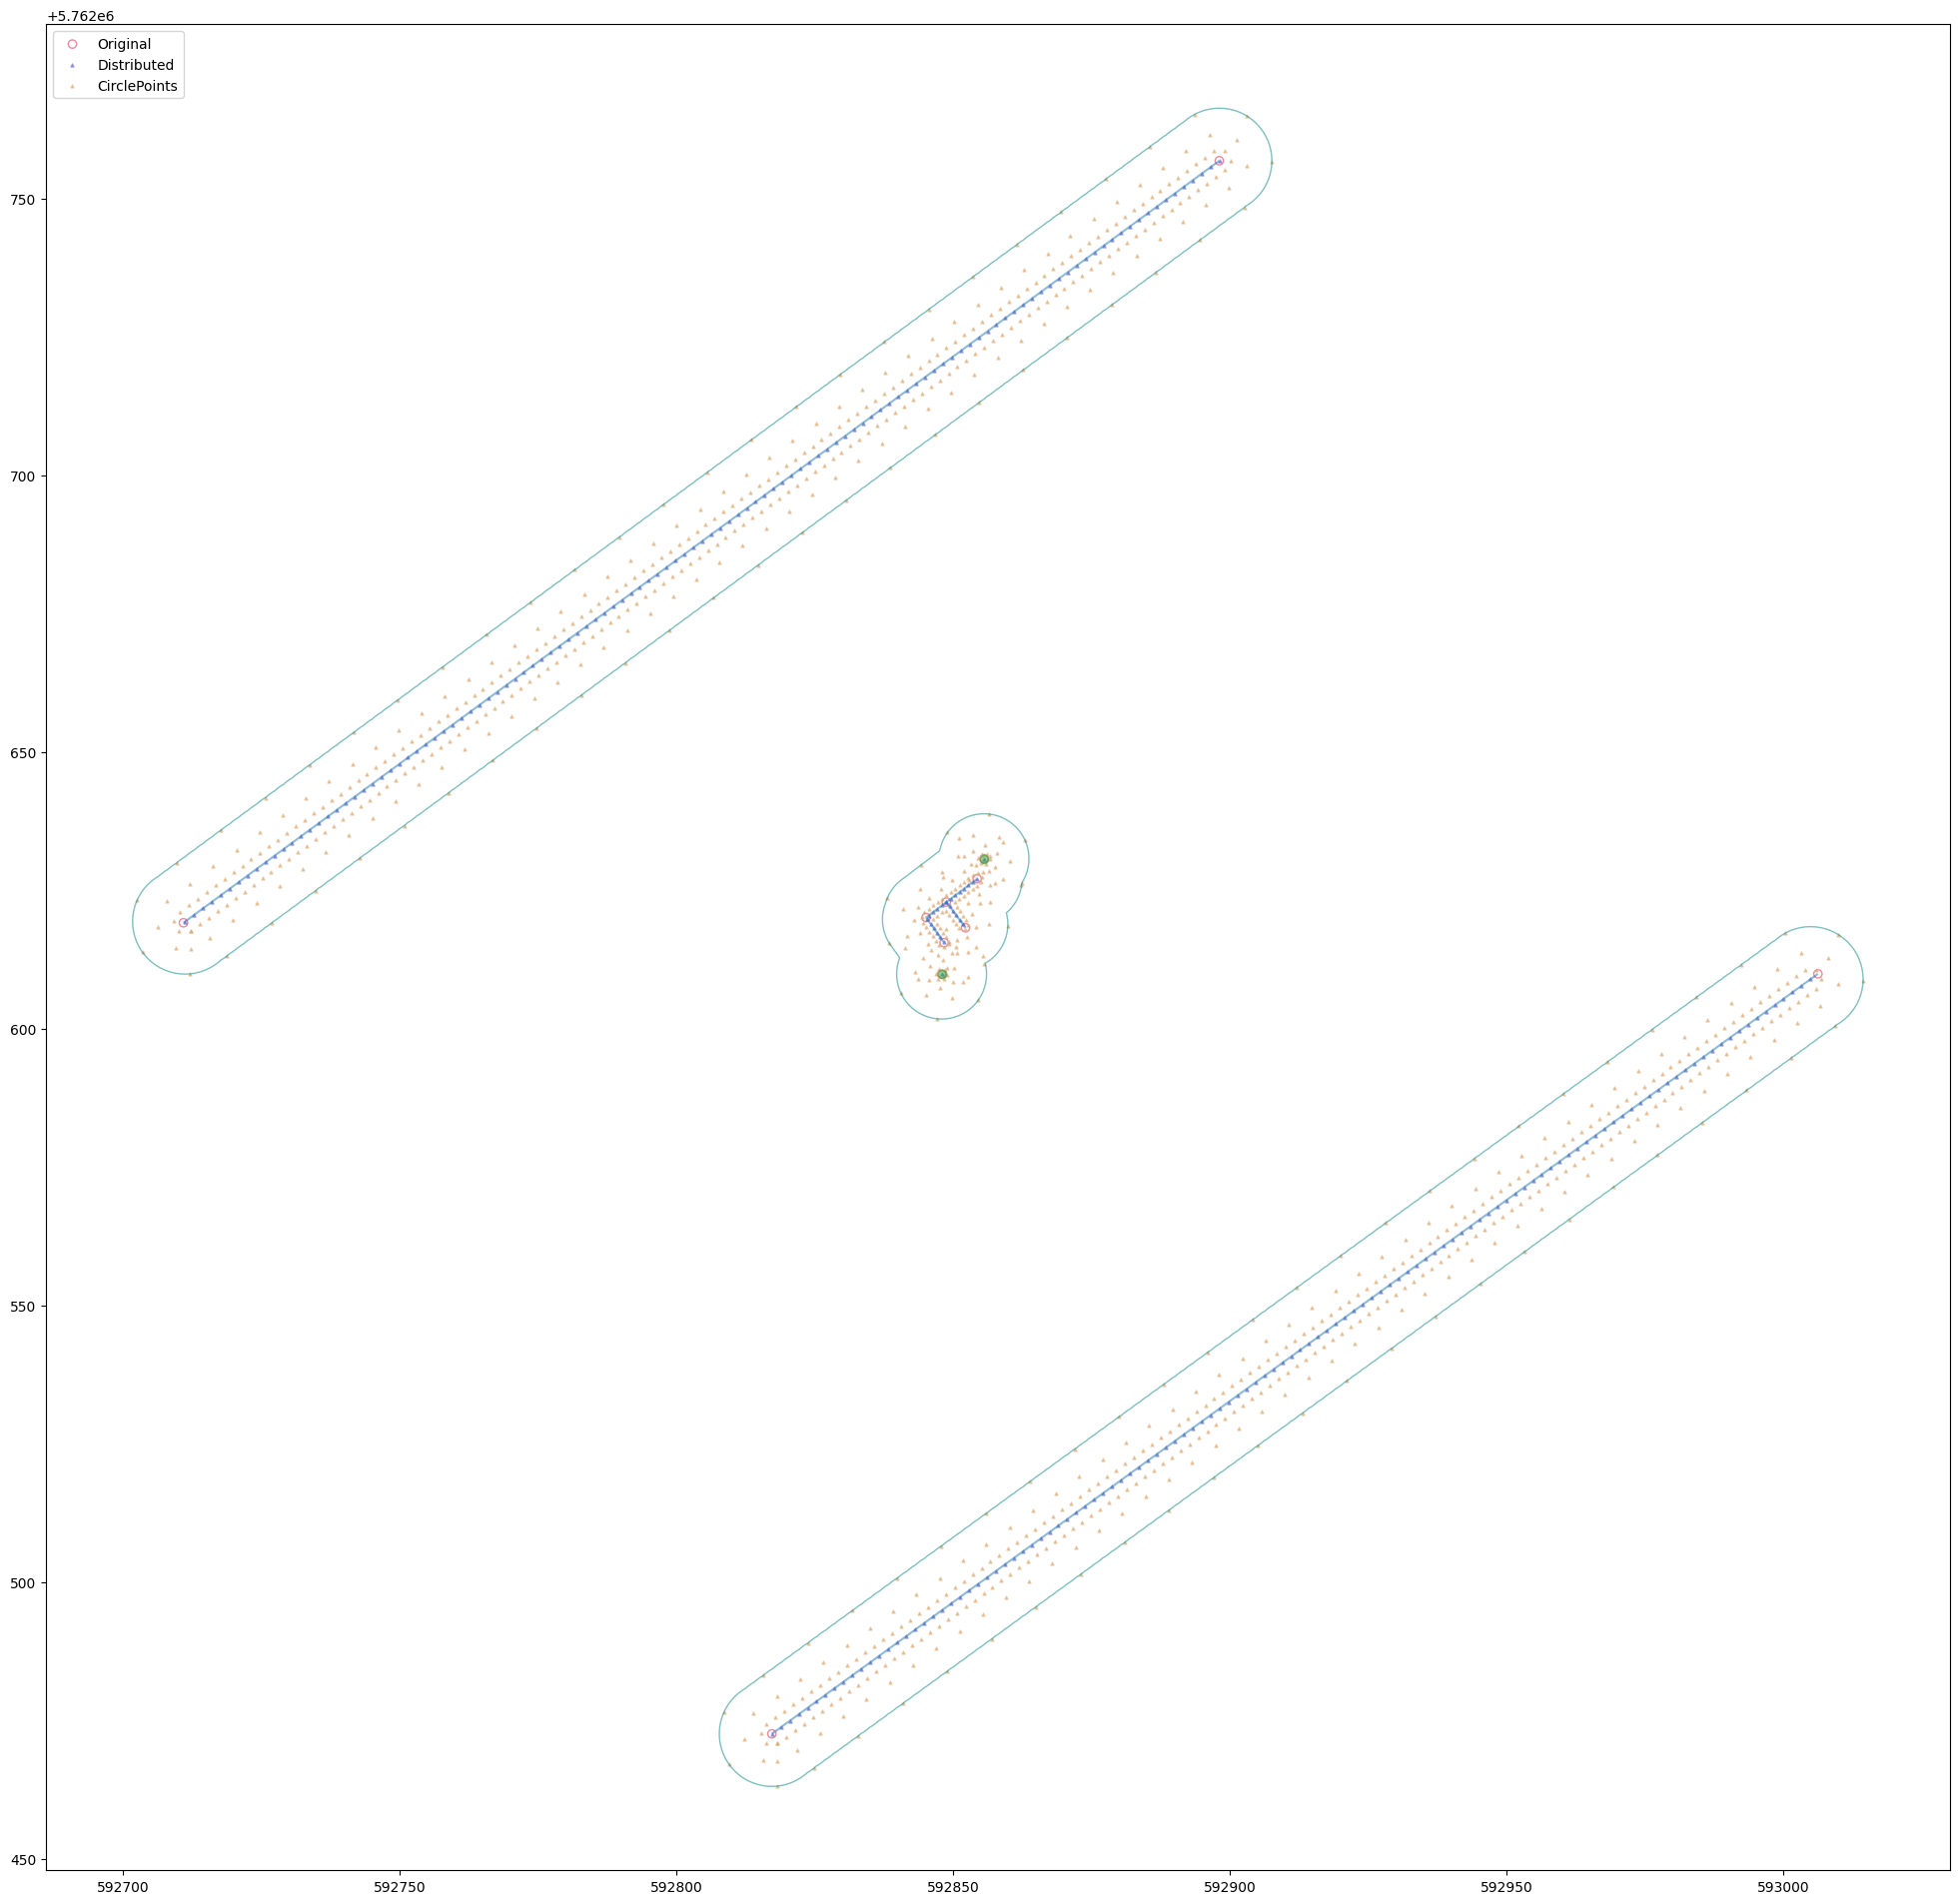

In [6]:
plotCirclesPoints(vorMesh)

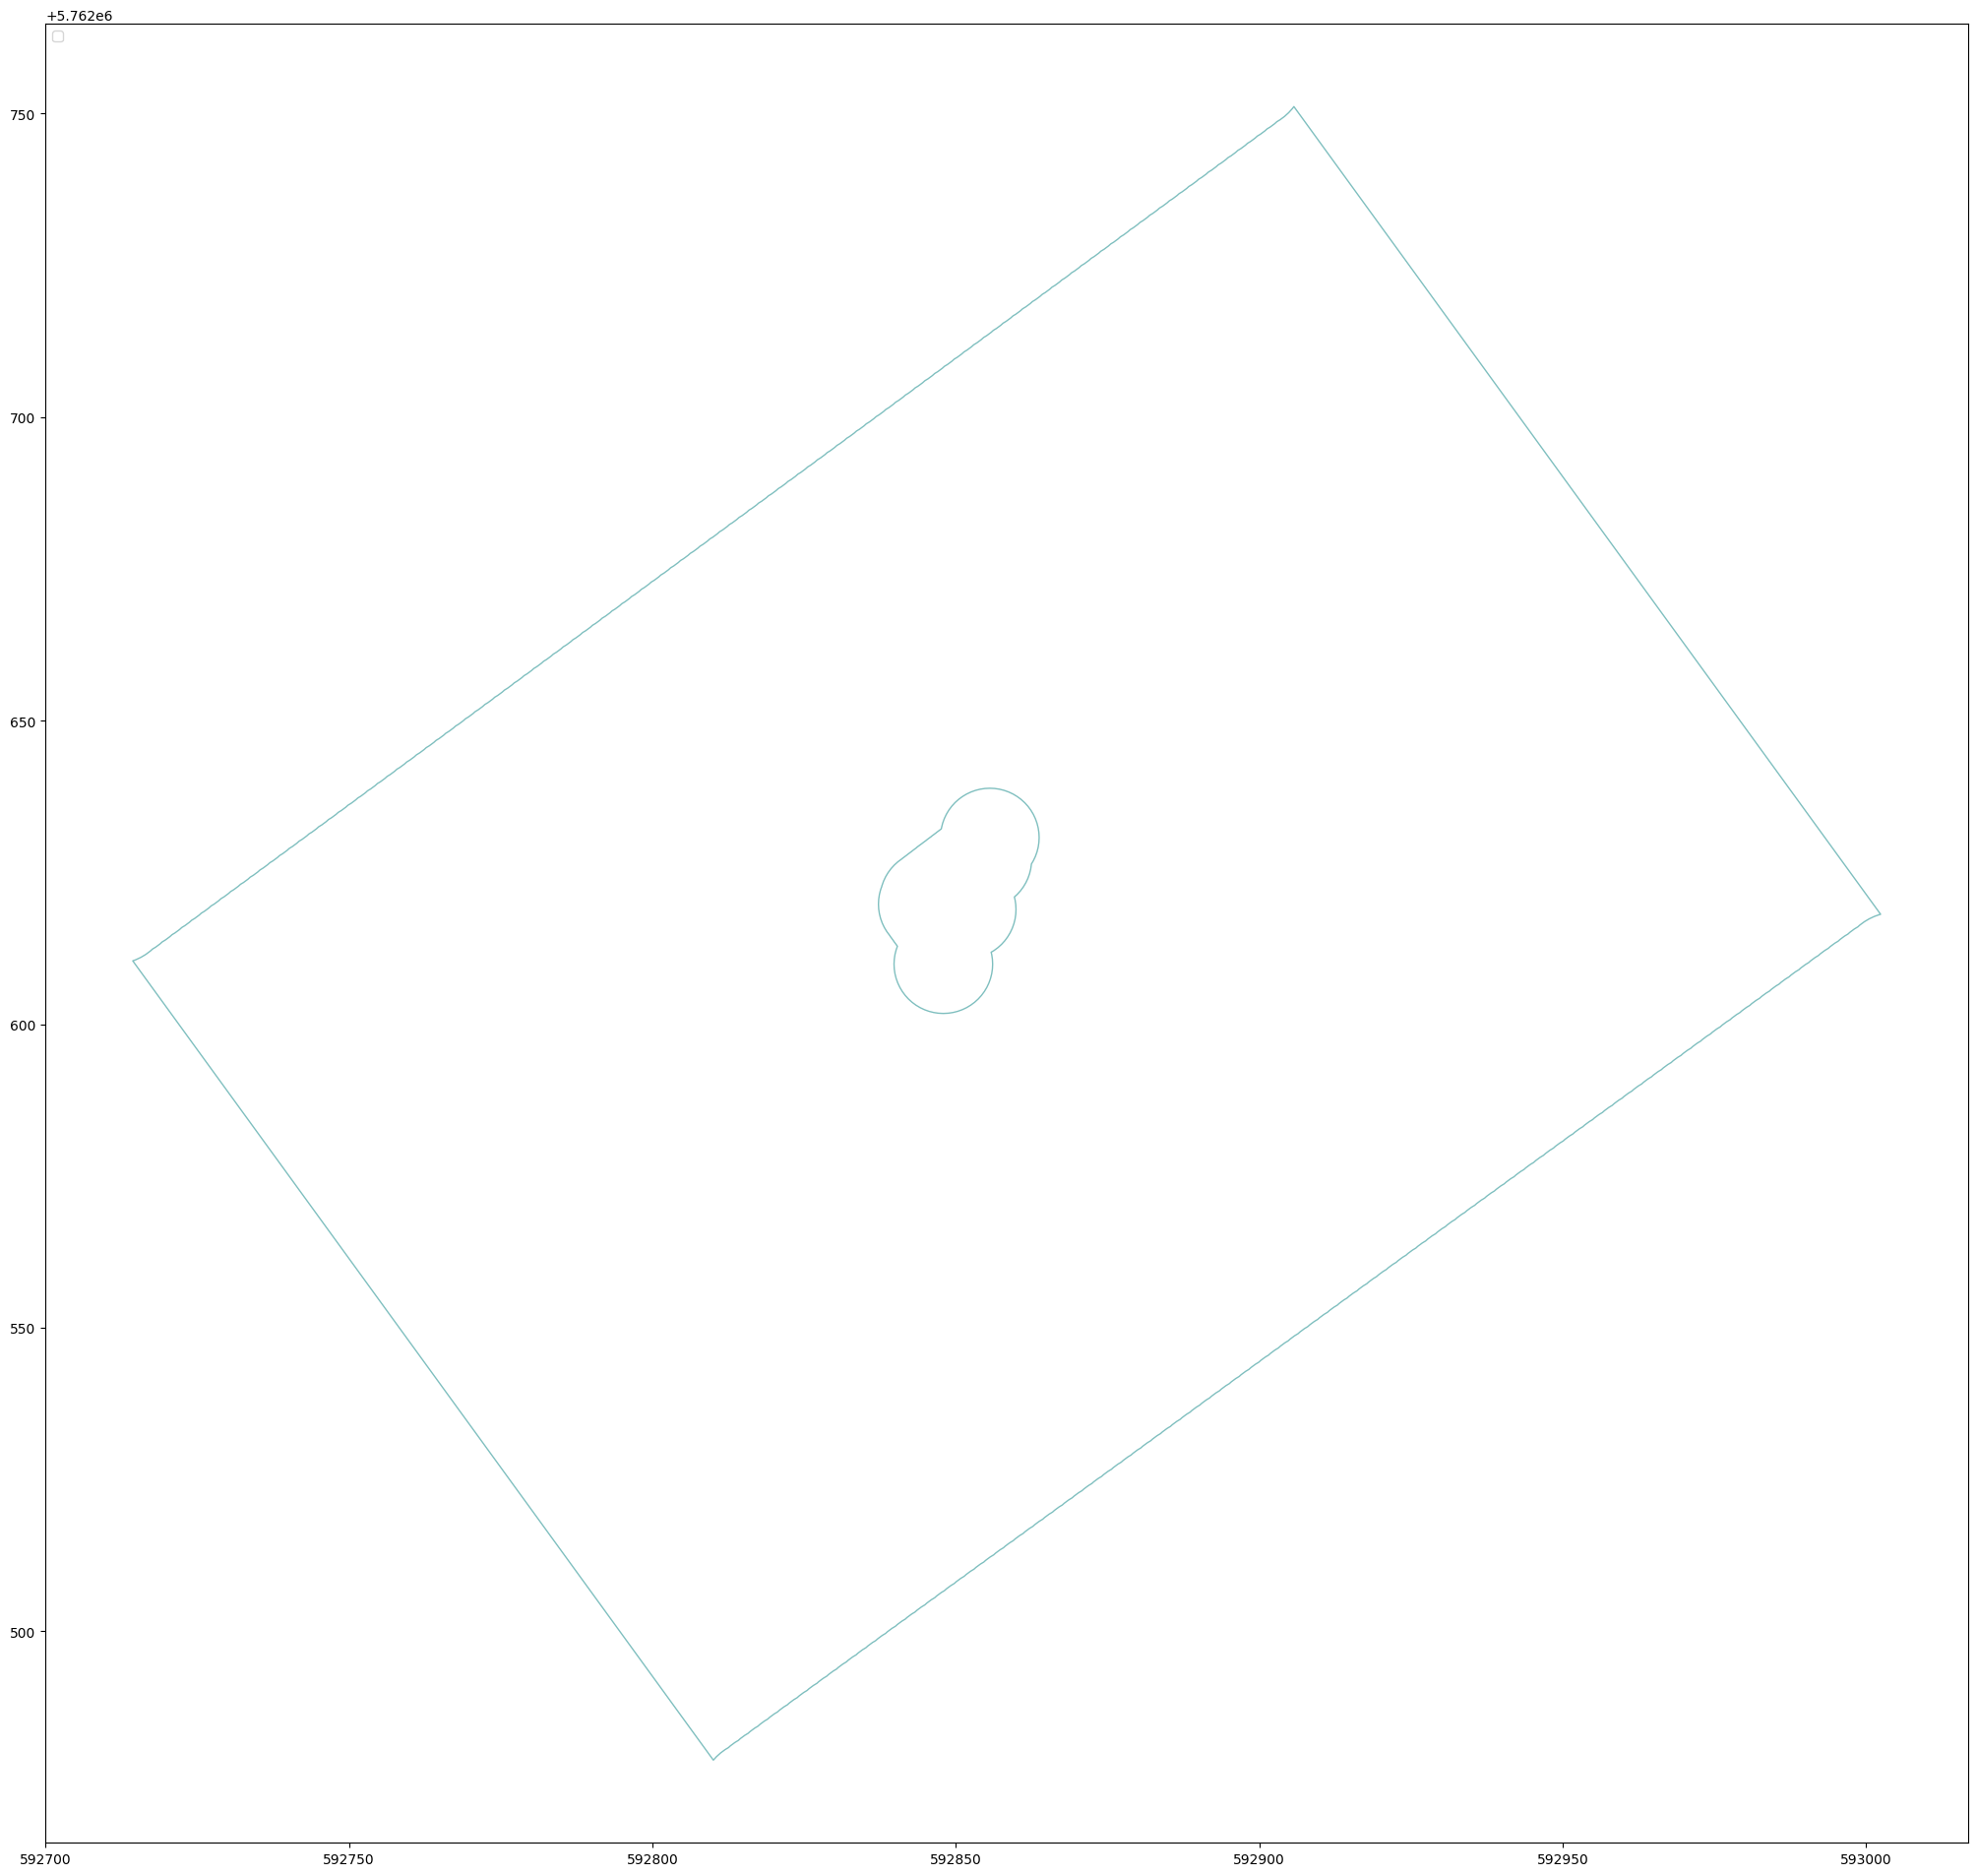

In [7]:
plotKeyList(vorMesh, ['pointsMaxRefPoly'])

In [ ]:
# Show the resulting voronoi mesh

#open the mesh file
mesh=gpd.read_file(outPath+'/'+vorMesh.modelDis['meshName']+'.shp')
#plot the mesh
mesh.plot(figsize=(35,25), fc='crimson', alpha=0.3, ec='teal')